# Concrete_Compressive_Strength_Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Concrete_data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.rename(columns={'csMPa':'strength'},inplace=True)
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
cement,1030.0,281.167864,104.506364,102.00,116.0000,153.55,192.375,272.900,350.000,425.00,531.300,540.0
slag,1030.0,73.895825,86.279342,0.00,0.0000,0.00,0.000,22.000,142.950,192.00,290.200,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.0000,0.00,0.000,0.000,118.300,141.06,185.213,200.1
water,1030.0,181.567282,21.354219,121.80,127.0870,154.60,164.900,185.000,192.000,203.50,228.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.0000,0.00,0.000,6.400,10.200,12.21,23.400,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,817.9290,852.10,932.000,968.000,1029.400,1076.45,1125.000,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,594.0000,664.07,730.950,779.500,824.000,880.76,943.100,992.6
age,1030.0,45.662136,63.169912,1.00,3.0000,3.00,7.000,28.000,56.000,100.00,365.000,365.0
strength,1030.0,35.817961,16.705742,2.33,6.8858,14.20,23.710,34.445,46.135,58.82,77.300,82.6


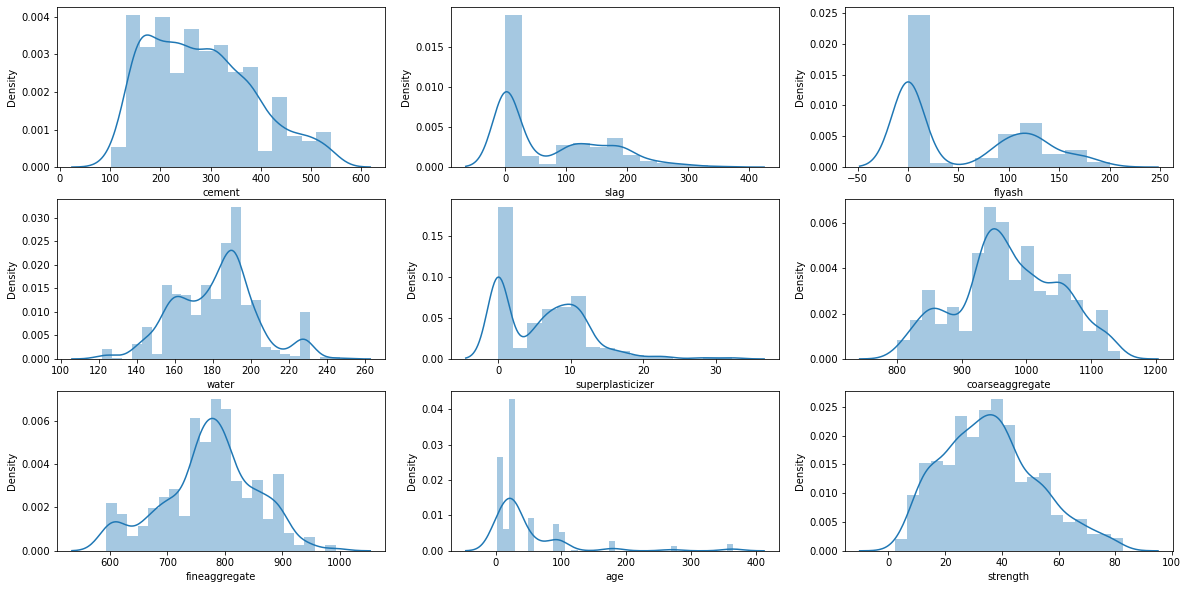

In [6]:
plt.figure(figsize=(20,10))
for i,var in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.distplot(df[var])

In [7]:
for var in df.columns:
    print(var,':',len(df[var].value_counts()))

cement : 278
slag : 185
flyash : 156
water : 195
superplasticizer : 111
coarseaggregate : 284
fineaggregate : 302
age : 14
strength : 845


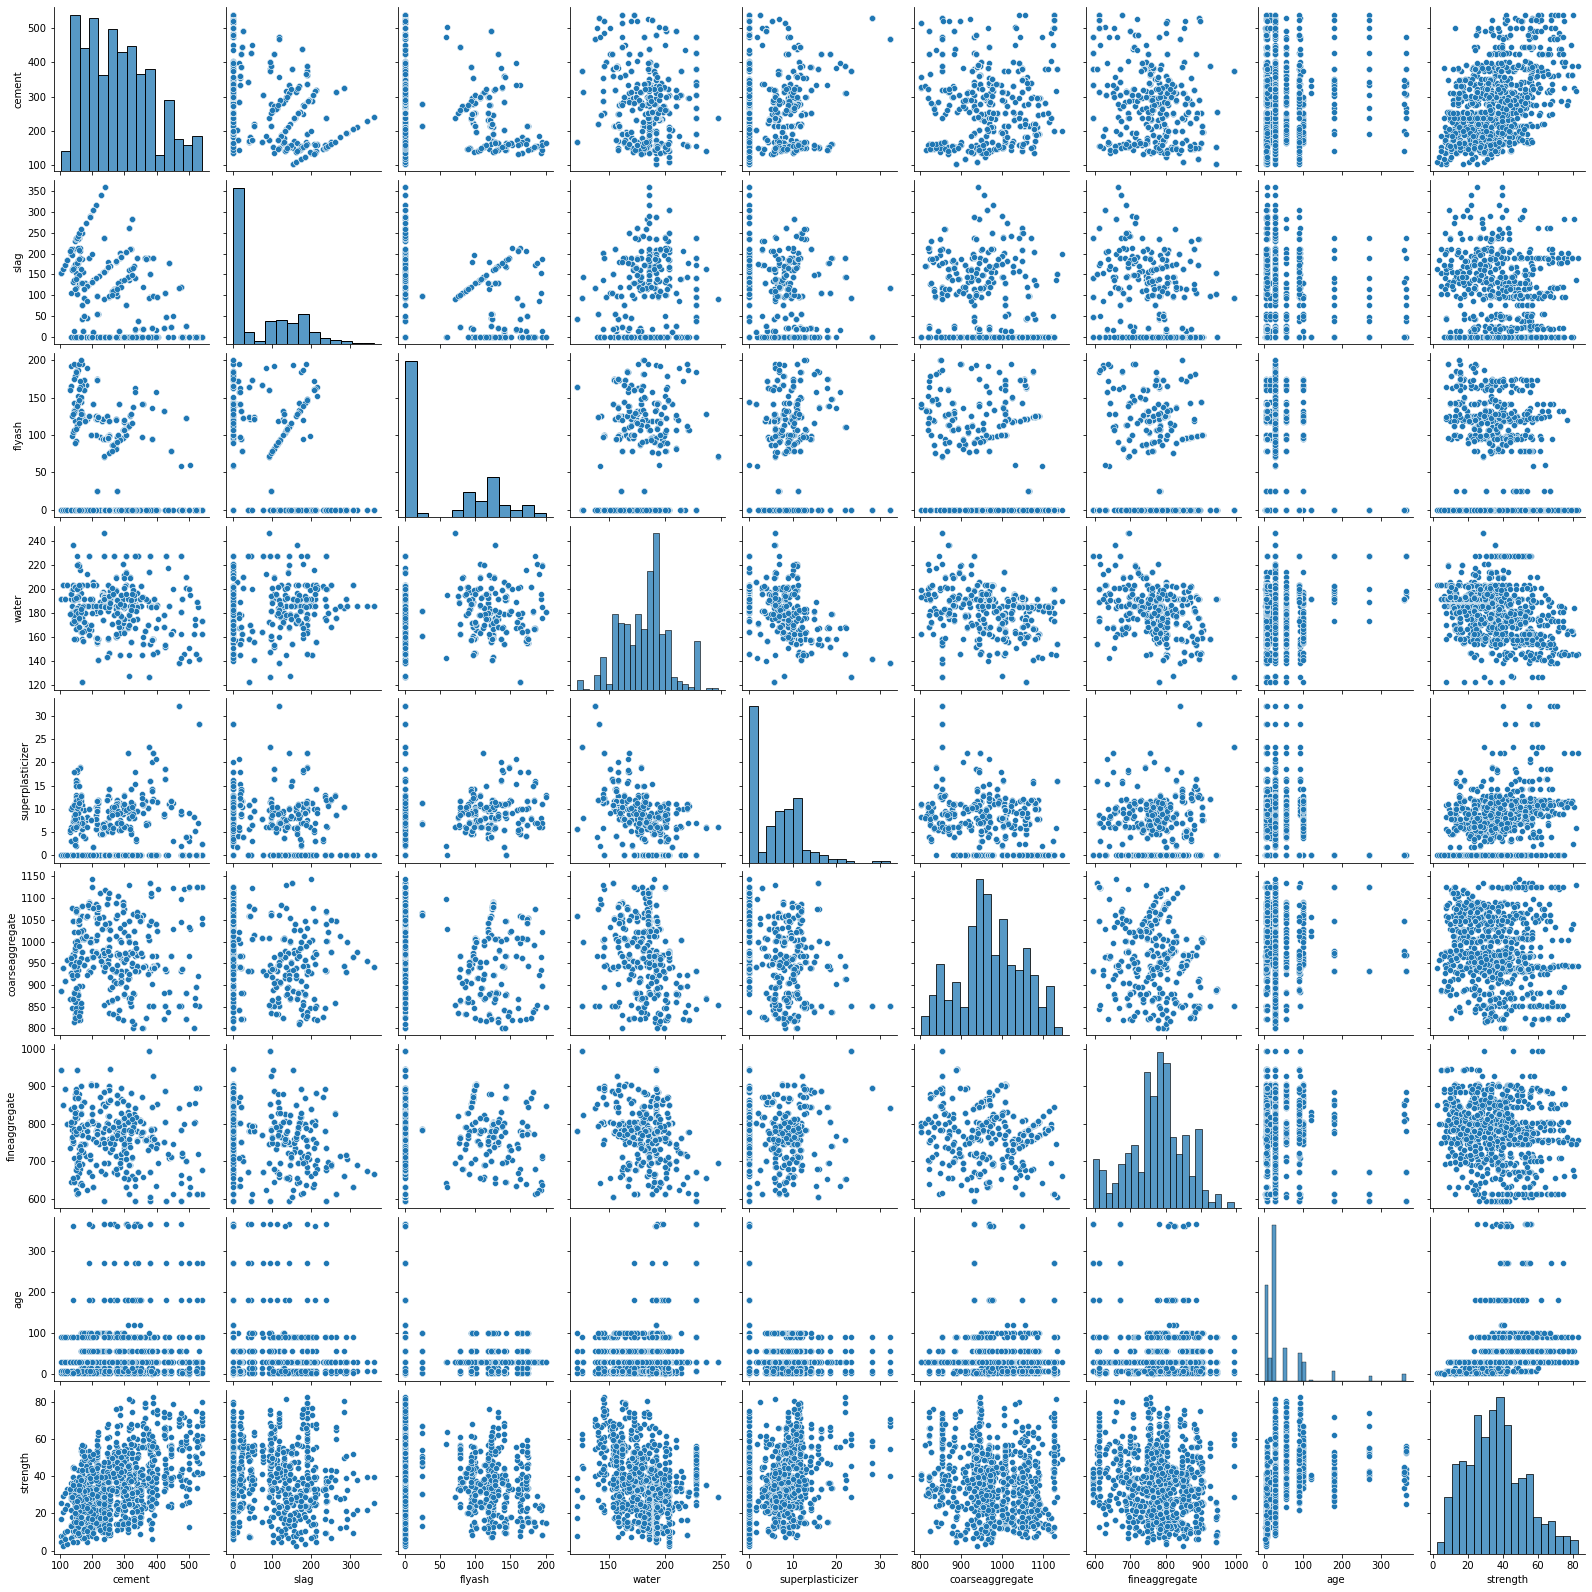

In [8]:
sns.pairplot(df)

<AxesSubplot:>

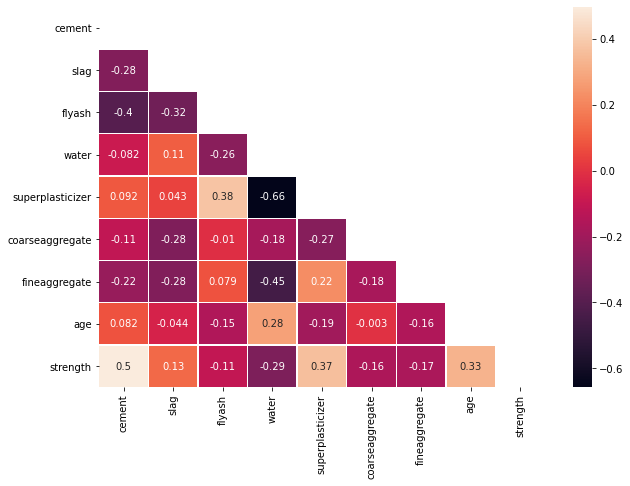

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.3,mask=np.triu(df.corr()))

In [10]:
from sklearn.model_selection import train_test_split
X=df.drop(['strength'],axis=1)
y=df['strength']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train1)
X_test=scaler.transform(X_test1)
X_train=pd.DataFrame(X_train,columns=X_train1.columns,index=X_train1.index)
X_test=pd.DataFrame(X_test,columns=X_test1.columns,index=X_test1.index)

In [12]:
from sklearn.linear_model import LinearRegression
Lin_reg=LinearRegression(fit_intercept=False)
Lin_reg.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [13]:
Lin_reg.coef_

array([12.4707515 ,  9.60167889,  5.87663436, -3.10942845,  1.88214401,
        1.7298186 ,  1.82305303,  7.11727713])

In [14]:
pd.DataFrame(Lin_reg.coef_,X.columns,columns=["Coefficient"])

,Coefficient
cement,12.470751
slag,9.601679
flyash,5.876634
water,-3.109428
superplasticizer,1.882144
coarseaggregate,1.729819
fineaggregate,1.823053
age,7.117277


In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
y_pred = Lin_reg.predict(X_train)
y_pred1 = Lin_reg.predict(X_test)

from sklearn import metrics
print('train value evaluation:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_train, y_pred))
print('\ntest value evaluation:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred1))

train value evaluation:
Mean Absolute Error: 36.10087378640777
Mean Squared Error: 1413.6051321301436
Root Mean Squared Error: 37.597940530435224
Mean Absolute Percentage Error: 121.86241364026577

test value evaluation:
Mean Absolute Error: 36.06184345746961
Mean Squared Error: 1396.0722039903665
Root Mean Squared Error: 37.36404961979317
Mean Absolute Percentage Error: 129.896357801274


In [17]:
pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred1)])

,strength,0
747,26.06,NaN
718,10.35,NaN
175,79.30,NaN
828,74.99,NaN
713,9.69,NaN
...,...,...
201,NaN,-15.074413
202,NaN,5.338350
203,NaN,-4.756587
204,NaN,-2.636096


In [20]:
import statsmodels.api as sm
X_endog = sm.add_constant(X_traind1)
X_endog1 = sm.add_constant(X_testd1)
model = sm.OLS(y_train, X_endog)
res=model.fit()

In [21]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          6.37e-162
Time:                        22:15:05   Log-Likelihood:                -3109.3
No. Observations:                 824   AIC:                             6233.
Df Residuals:                     817   BIC:                             6266.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               36.1009      0.368     97.971      0.000      35.378      36.824
cement              10.7714      0.504     21.369      0.000       9.782      11.761
slag                 7.8435      0.489     16.052      0.000       6.884       8.803
flyash               4.4646      0.562      7.949      0.000       3.362       5.567
water               -4.8293      0.512     -9.424      0.000      -5.835      -3.823
superplasticizer     1.4320      0.574      2.495      0.013       0.305       2.559
age                  7.0904      0.385     18.400      0.000       6.334       7.847
==============================================================================
Omnibus:                        5.778   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.782
Skew:                          -0.205   Prob(JB):                       0.0555
Kurtosis:                       2.996   Cond. No.                         3.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X_traind1=X_train.drop(['coarseaggregate','fineaggregate'],axis=1)
X_testd1=X_test.drop(['coarseaggregate','fineaggregate'],axis=1)

In [22]:
y_pred_sm=res.predict(X_endog)
y_pred_sm1=res.predict(X_endog1)

print('train value evaluation:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_sm))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_sm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_sm)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_train, y_pred_sm))
print('\ntest value evaluation:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_sm1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_sm1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sm1)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_sm1))

train value evaluation:
Mean Absolute Error: 8.39266375770256
Mean Squared Error: 110.93319807373243
Root Mean Squared Error: 10.532482996603052
Mean Absolute Percentage Error: 31.301166471616877

test value evaluation:
Mean Absolute Error: 7.814468585384257
Mean Squared Error: 95.08915151064188
Root Mean Squared Error: 9.751366648354573
Mean Absolute Percentage Error: 33.11051880955758


In [47]:
from sklearn.svm import SVR
SVR_reg=SVR(C=10000,gamma=0.1,kernel='rbf')
SVR_reg.fit(X_train,y_train)

SVR(C=10000, gamma=0.1)

In [48]:
y_pred = SVR_reg.predict(X_train)
y_pred1 = SVR_reg.predict(X_test)

from sklearn import metrics
print('train value evaluation:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_train, y_pred))
print('\ntest value evaluation:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred1))

train value evaluation:
Mean Absolute Error: 1.1835984254696812
Mean Squared Error: 6.494813112584769
Root Mean Squared Error: 2.5484923214686694
Mean Absolute Percentage Error: 4.37533752479946

test value evaluation:
Mean Absolute Error: 3.3987637997597133
Mean Squared Error: 37.46823675774788
Root Mean Squared Error: 6.121130349677899
Mean Absolute Percentage Error: 10.740933796334943


In [61]:
pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred1,index=y_test.index)],axis=1)


,strength,0
747,26.06,29.328190
718,10.35,7.657863
175,79.30,79.199950
828,74.99,60.305222
713,9.69,10.101109
...,...,...
624,27.53,28.842598
987,33.76,35.251863
424,33.01,34.126023
889,33.72,35.308839
